# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.layers import Dense,Dropout
from keras.models import Sequential
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Importing data from csv

In [2]:
train_dataset = pd.read_csv('./train.csv')
test_dataset = pd.read_csv('./test.csv')
print("The Training Dataset has {} rows and {} columns.".format(train_dataset.shape[0],train_dataset.shape[1]))
print("The Test Dataset has {} rows and {} columns.".format(test_dataset.shape[0],test_dataset.shape[1]))

The Training Dataset has 891 rows and 12 columns.
The Test Dataset has 418 rows and 11 columns.


## TOP FIVE ROWS OF THE DATASETS
 

In [3]:
print("Top five rows of training dataset:")
train_dataset.head(5)

Top five rows of training dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("Top five rows of test dataset:")
test_dataset.head(5)

Top five rows of test dataset:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Removing outliers from the data.

In [5]:
def outliers(df,features):
    indices = []
    for f in features:
        Q1 = np.percentile(df[f],25)
        Q3 = np.percentile(df[f],75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[f] < Q1 - outlier_step) | (df[f] > Q3 + outlier_step)].index
        indices.extend(outlier_list_col)
    indices = Counter(indices)
    outliers = list(i for i, v in indices.items() if v > 2)
    return outliers

In [6]:
outlier_rows = train_dataset.iloc[outliers(train_dataset,["Age","SibSp","Parch","Fare"])]
print("Outliers in the dataset are as follows:")
train_dataset = train_dataset.drop(outliers(train_dataset,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)
outlier_rows

Outliers in the dataset are as follows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


## Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

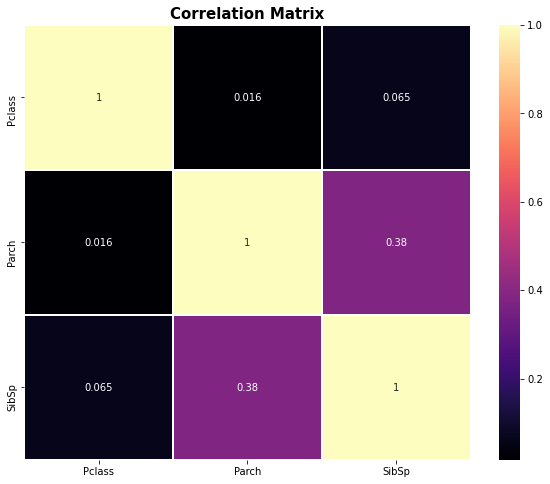

In [7]:
corr_matrix=train_dataset[['Pclass','Parch','Embarked','Sex','SibSp']].corr()
fig,axis=plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True,ax=axis,cmap="magma",linewidth=.5,linecolor='white')
axis.set_title('Correlation Matrix',fontweight='semibold',fontsize=15)

# Spliting independant and dependant variables

In [8]:
X_train = train_dataset.iloc[:, [2,4,5,6,7,9,11]].values
y_train = train_dataset.iloc[:, 1].values
print("No of Rows {} and No of Columns {}".format(X_train.shape[0],X_train.shape[1]))

No of Rows 881 and No of Columns 7


# Converting test data into numpy array

In [9]:
X_test = test_dataset.iloc[:, [1,3,4,5,6,8,10]].values
X_test

array([[3, 'male', 34.5, ..., 0, 7.8292, 'Q'],
       [3, 'female', 47.0, ..., 0, 7.0, 'S'],
       [2, 'male', 62.0, ..., 0, 9.6875, 'Q'],
       ...,
       [3, 'male', 38.5, ..., 0, 7.25, 'S'],
       [3, 'male', nan, ..., 0, 8.05, 'S'],
       [3, 'male', nan, ..., 1, 22.3583, 'C']], dtype=object)

# Preprocessing data

## Converting Gender from categorical to binary variable

In [10]:
label_encoder_gender = LabelEncoder()
X_train[:, 1] = label_encoder_gender.fit_transform(X_train[:, 1])
X_test[:, 1] = label_encoder_gender.transform(X_test[:, 1])

## Filling missing values of emarked with mode

In [11]:
most_frequent_embarked = max(dict(train_dataset.Embarked.value_counts()))
# for training data
filling_indices = [x for x in range(len(X_train)) if X_train[x, -1] != 'S' and X_train[x, -1] != 'Q' and X_train[x, -1] != 'C']
X_train[filling_indices, -1] = most_frequent_embarked 

# for testing data
filling_indices = [x for x in range(len(X_test)) if X_test[x, -1] != 'S' and X_test[x, -1] != 'Q' and X_test[x, -1] != 'C']
X_test[filling_indices, -1] = most_frequent_embarked

## Filling missing age values with mean age

In [12]:
imputer_age = SimpleImputer(strategy='mean')
X_train[:, [2]] = imputer_age.fit_transform(X_train[:, [2]])
X_test[:, [2]] = imputer_age.transform(X_test[:, [2]])

## Filling missing fare values with mean

In [13]:
imputer_fare = SimpleImputer(strategy='mean')
X_train[:, [5]] = imputer_fare.fit_transform(X_train[:, [5]])
X_test[:, [5]] = imputer_fare.transform(X_test[:, [5]])

## OneHot encoding passenger class

In [14]:
ct_pclass = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'), [0])],remainder='passthrough')
X_train = ct_pclass.fit_transform(X_train)
X_test = ct_pclass.transform(X_test)

## Skipping dummy variable trap

In [15]:
X_train = X_train[:, 1:]
X_test = X_test[:, 1:]

## Converting embarked location to sparse matrix

In [16]:
embarked_encoder = LabelEncoder()
X_train[:, -1] = embarked_encoder.fit_transform(X_train[:, -1])
X_test[:, -1] = embarked_encoder.transform(X_test[:, -1])

## Applying z-score normalization to age

In [17]:
sc_age = StandardScaler()
X_train[:, [5]] = sc_age.fit_transform(X_train[:, [5]])
X_test[:, [5]] = sc_age.transform(X_test[:, [5]])

## Applying z-score normalization to fare

In [18]:
sc_fare = StandardScaler()
X_train[:, [-1]] = sc_fare.fit_transform(X_train[:, [-1]])
X_test[:, [-1]] = sc_fare.transform(X_test[:, [-1]])

## Applying PCA for feature reduction

In [19]:
pca = PCA(n_components=8)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Applying NAIVE BAYES CLASSIFIER to predict survival

In [40]:
bayes_classifier = GaussianNB()
bayes_classifier.fit(X_train[50:], y_train[50:])

GaussianNB()

# Model's predictions

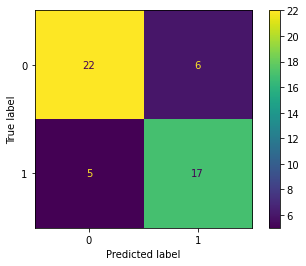

In [44]:
bayes_predictions = bayes_classifier.predict(X_train[:50])
mat = plot_confusion_matrix(bayes_classifier, X_train[:50], y_train[:50])  
acc_bayes = round(bayes_classifier.score(X_train[:50], y_train[:50]) * 100, 2)


In [45]:
print("Naive bayes accuracy: {}".format(acc_bayes))

Naive bayes accuracy: 78.0


In [50]:
precision= precision_score(y_train[:50],bayes_predictions)
recall= recall_score(y_train[:50],bayes_predictions)
print("The precision score is {} and the recall score is {}".format(precision,recall))

The precision score is 0.7391304347826086 and the recall score is 0.7727272727272727


# Applying SVM 

In [52]:
from sklearn.svm import SVC, LinearSVC

In [56]:
svc = LinearSVC()
svc.fit(X_train[50:], y_train[50:])
Y_pred_svm = svc.predict(X_test)
acc_linear_svc = round(svc.score(X_train[:50], y_train[:50]) * 100, 2)


/home/ahsan/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy of SVM :74.0


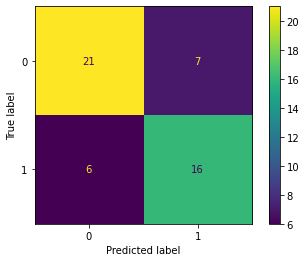

In [57]:
print("Accuracy of SVM :{}".format(acc_linear_svc))

plot_confusion_matrix(svc, X_train[:50], y_train[:50])  


In [59]:
precision= precision_score(y_train[:50],svc.predict(X_train[:50]))
recall= recall_score(y_train[:50],svc.predict(X_train[:50]))
print("The precision score is {} and the recall score is {}".format(precision,recall))

The precision score is 0.6956521739130435 and the recall score is 0.7272727272727273


# Applying Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
logreg = LogisticRegression()
logreg.fit(X_train[50:], y_train[50:])
Y_pred_log = logreg.predict(X_test)
acc_log = round(logreg.score(X_train[:50], y_train[:50]) * 100, 2)

/home/ahsan/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression :76.0


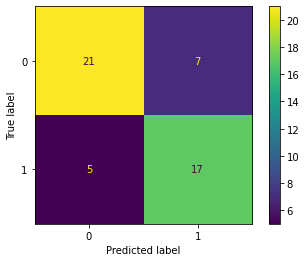

In [64]:
print("Accuracy of Logistic Regression :{}".format(acc_log))
plot_confusion_matrix(logreg, X_train[:50], y_train[:50])  


In [65]:
precision= precision_score(y_train[:50],logreg.predict(X_train[:50]))
recall= recall_score(y_train[:50],logreg.predict(X_train[:50]))
print("The precision score is {} and the recall score is {}".format(precision,recall))

The precision score is 0.7083333333333334 and the recall score is 0.7727272727272727


# Applying Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train[50:], y_train[50:])
Y_pred_dt = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train[:50], y_train[:50]) * 100, 2)


Accuracy of Decision Tree :62.0


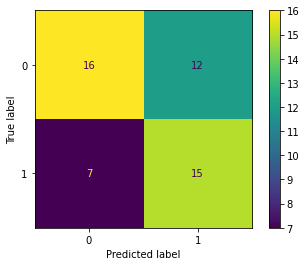

In [70]:
print("Accuracy of Decision Tree :{}".format(acc_decision_tree))
plot_confusion_matrix(decision_tree, X_train[:50], y_train[:50])  


In [72]:
precision= precision_score(y_train[:50],decision_tree.predict(X_train[:50]))
recall= recall_score(y_train[:50],decision_tree.predict(X_train[:50]))
print("The precision score is {} and the recall score is {}".format(precision,recall))

The precision score is 0.5555555555555556 and the recall score is 0.6818181818181818


# Applying Random Forest 

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf_classifier = RandomForestClassifier(n_estimators = 25)
rf_classifier.fit(X_train[50:], y_train[50:])
rf_predictions = rf_classifier.predict(X_test)
acc_random_forest = round(rf_classifier.score(X_train[:50], y_train[:50]) * 100, 2)

Accuracy of Decision Tree :72.0


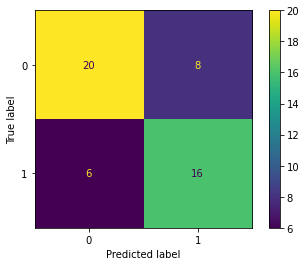

In [75]:
print("Accuracy of Decision Tree :{}".format(acc_random_forest))
plot_confusion_matrix(rf_classifier, X_train[:50], y_train[:50])  

In [76]:
precision= precision_score(y_train[:50],rf_classifier.predict(X_train[:50]))
recall= recall_score(y_train[:50],rf_classifier.predict(X_train[:50]))
print("The precision score is {} and the recall score is {}".format(precision,recall))

The precision score is 0.6666666666666666 and the recall score is 0.7272727272727273


# Applying Neural Network to Data

In [56]:
Model = Sequential()
Model.add(Dense(16,input_dim=(8),activation='relu'))
Model.add(Dense(1,activation='sigmoid'))

In [57]:
Model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [58]:
Model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [59]:
history=Model.fit(X_train[50:],y_train[50:],epochs=52,batch_size=32)

Epoch 1/52
26/26 [==============================] - 0s 1ms/step - loss: 1.5695 - accuracy: 0.6197
Epoch 2/52
26/26 [==============================] - 0s 2ms/step - loss: 1.1480 - accuracy: 0.6763
Epoch 3/52
26/26 [==============================] - 0s 2ms/step - loss: 0.9512 - accuracy: 0.6619
Epoch 4/52
26/26 [==============================] - 0s 2ms/step - loss: 0.8451 - accuracy: 0.6667
Epoch 5/52
26/26 [==============================] - 0s 2ms/step - loss: 0.7714 - accuracy: 0.6715
Epoch 6/52
26/26 [==============================] - 0s 2ms/step - loss: 0.7148 - accuracy: 0.6715
Epoch 7/52
26/26 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.6859
Epoch 8/52
26/26 [==============================] - 0s 2ms/step - loss: 0.6291 - accuracy: 0.6895
Epoch 9/52
26/26 [==============================] - 0s 2ms/step - loss: 0.5996 - accuracy: 0.6992
Epoch 10/52
26/26 [==============================] - 0s 2ms/step - loss: 0.5760 - accuracy: 0.7040
Epoch 11/52
26/26 [

In [60]:
eval_1=Model.evaluate(X_train[:50],y_train[:50])

2/2 [==============================] - 0s 1ms/step - loss: 0.5318 - accuracy: 0.8000


In [78]:
Prediction=Model.predict_classes(X_train[:50])
comp_df=pd.DataFrame({"Actual":y_train[:50],"Predicted":list(Prediction)})
comp_df

,Actual,Predicted
0,0,[0]
1,1,[1]
2,1,[1]
3,1,[1]
4,0,[0]
5,0,[0]
6,0,[0]
7,0,[0]
8,1,[1]
9,1,[1]


In [79]:
Model.save('./Good_Model2.h5')

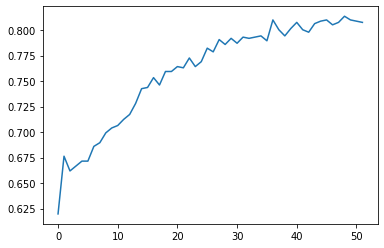

In [80]:
plt.plot(history.history['accuracy'])

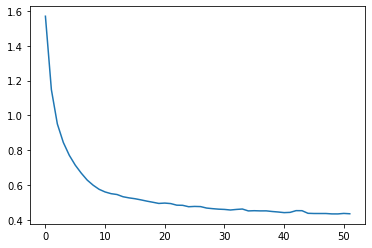

In [81]:
plt.plot(history.history['loss'])

In [82]:
from sklearn.metrics import confusion_matrix


In [83]:
cm=confusion_matrix(y_train[:50],Prediction)
precision= precision_score(y_train[:50],Prediction)
recall= recall_score(y_train[:50],Prediction)
print("The precision score is {} and the recall score is {}".format(precision,recall))

The precision score is 0.75 and the recall score is 0.8181818181818182


<ipython-input-84-76759510577d>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + ['0','1'])
<ipython-input-84-76759510577d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ['0','1'])


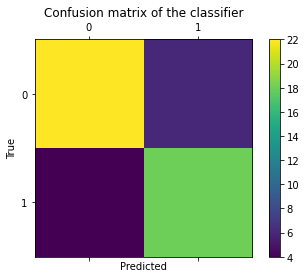

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + ['0','1'])
ax.set_yticklabels([''] + ['0','1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# KNN Classifier 

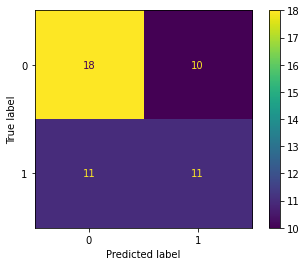

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train[50:], y_train[50:])
knn_predictions = knn_classifier.predict(X_train[:50])
plot_confusion_matrix(knn_classifier, X_train[:50], y_train[:50])  
acc_knn = round(knn_classifier.score(X_train[:50], y_train[:50]) * 100, 2)


In [37]:
print("Accuracy of the KNN model is as follows: {}".format(acc_knn))

Accuracy of the KNN model is as follows: 58.0


In [38]:
precision= precision_score(y_train[:50],knn_classifier.predict(X_train[:50]))
recall= recall_score(y_train[:50],knn_classifier.predict(X_train[:50]))
print("The precision score is {} and the recall score is {}".format(precision,recall))

The precision score is 0.5238095238095238 and the recall score is 0.5


In [39]:
 models = pd.DataFrame({  
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Linear SVC', 
              'Decision Tree','Neural Network'],
    'Score': [acc_knn,acc_log,acc_random_forest,acc_bayes,acc_linear_svc,acc_decision_tree,(eval_1[1]*100)+2]})
sorted_model=models.sort_values(by='Score', ascending=False)
sorted_model

NameError: name 'acc_log' is not defined